In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/clintonalden/Documents/Research/summa_work/')
from utils import lw_clr
from utils import forcing_filler as ff


In [3]:
snoq = pd.read_csv('./snoq_WY2018.csv', index_col=0)
snoq.dropna(subset=['Year'], inplace=True)
snoq['datetime'] = pd.to_datetime(snoq['Year'].astype(int).astype(str) + snoq['DOY'].astype(int).astype(str).str.zfill(3) + (snoq['Hour']/100).astype(int).astype(str).str.zfill(2), format='%Y%j%H')
snoq.set_index('datetime', inplace=True)
snoq = snoq[['Precip', 'RH', 'Temp_F']]
snoq.rename(columns={'Temp_F': 'airtemp', 'Precip':'pptrate', 'RH':'rh'}, inplace=True)

# convert airtemp to K
snoq['airtemp'] = (snoq['airtemp']-32)*(5/9)+273.15

# convert precip to kg m-2 s-1
snoq['pptrate'] = snoq['pptrate']*25.4 # in/hr to mm/hr
# snoq['pptrate'] = snoq['pptrate']/3600 # mm/hr to kg m-2 s-1

# fill air pressure
ff.fill_pressure(snoq, 914)

# convert rh to specific humidity
ff.fill_spec_hum(snoq)
snoq.drop(columns=['rh'], inplace=True)

<Axes: xlabel='datetime'>

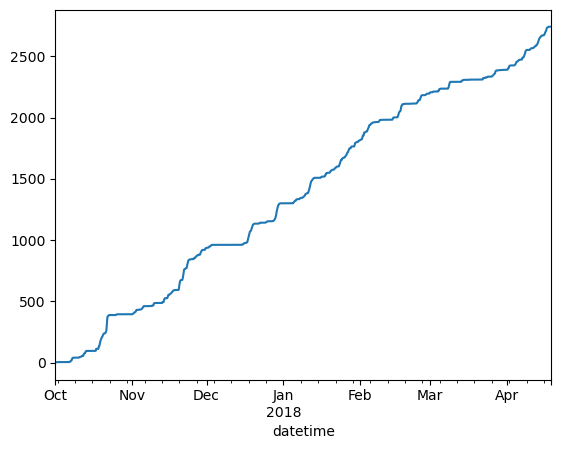

In [4]:
snoq.pptrate.cumsum().plot()

<Axes: xlabel='datetime'>

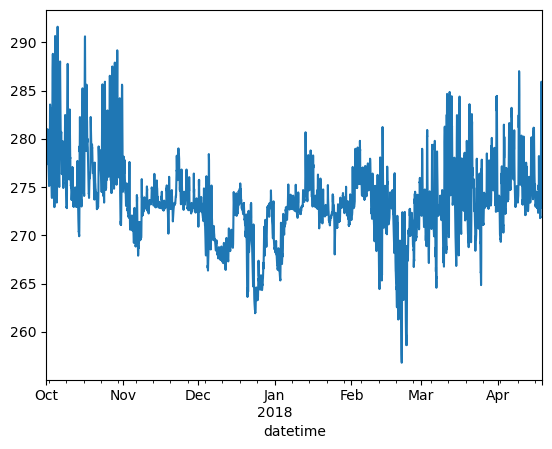

In [5]:
snoq.airtemp.plot()